# Logistic Regression - Titanic Example

 In this notebook explore prediction tasks where the response variable is categorical instead of numeric and look at a common classification technique known as logistic regression. We apply this technique to a data_set containing survival data for the passengers of the Titanic.

As part of the analysis, we will be doing the following:
Data extraction : we'll load the dataset and have a look at it.
Cleaning : we'll fill in some of the missing values.
Plotting : we'll create several charts that will (hopefully) help identify correlations and other insights

Two datasets are available: a training set and a test set. We'll be using the training set to build our predictive model and the testing set to evaluate it.

In [1]:
# import useful modules 
import pandas as pd
from pandas import DataFrame
import re
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

Let us start by loading the training set and having a first look at our data:

In [3]:
training_data = pd.read_csv("Titanic_train.csv")
test_data  = pd.read_csv("Titanic_test.csv")

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(training_data.info())
print("\n=======================================\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-nul

The <b>Survived</b> column is our target/dependent/reponse variable, 1 means the passenger survived, 0 means that the passenger died. 

Several other variables describe the passengers:
- PassengerId: and id given to each traveler on the boat.
- Pclass: the passenger class. It has three possible values: 1,2,3.
- Name
- Sex
- Age
- SibSp: number of siblings and spouses traveling with the passenger
- Parch: number of parents and children traveling with the passenger
- The ticket number
- The ticket fare
- The cabin number
- The port of embarkation. It has three possible values S,C,Q. (C = Cherbourg; Q = Queenstown; S = Southampton) 

Let us check which records in the training data are missing information for the Embarked field. 

In [6]:
# check the missing data for the Embarked field
training_data[training_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let's look at the survival chances depending on the port of embarkation

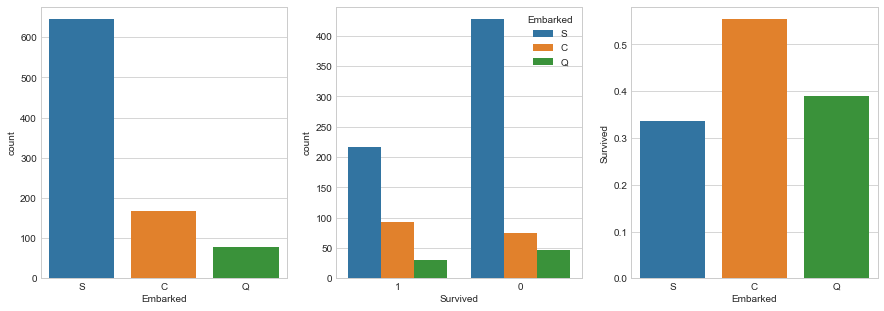

In [7]:
# plot
#sns.factorplot('Embarked','Survived', data=training_data,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=training_data, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=training_data, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = training_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

Lets look at other variables that may indicate where passengers embarked the ship.

In [8]:
training_data.loc[training_data.Ticket == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
print( 'C == ' + str( len(training_data.loc[training_data.Pclass == 1].loc[training_data.Fare > 75].loc[training_data.Fare < 85].loc[training_data.Embarked == 'C']) ) )
print( 'S == ' + str( len(training_data.loc[training_data.Pclass == 1].loc[training_data.Fare > 75].loc[training_data.Fare < 85].loc[training_data.Embarked == 'S']) ) )

C == 16
S == 13


In [10]:
training_data = training_data.set_value(training_data.Embarked.isnull(), 'Embarked', 'C')

In [11]:
training_data.loc[training_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Let us check which records are missing information for the Fare and Cabin fields

In [12]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Let's visualize a histogram of the fares paid by the 3rd class passengers who embarked in Southampton.

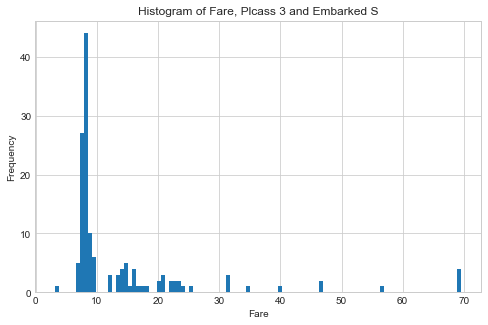

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

test_data[(test_data.Pclass==3)&(test_data.Embarked=='S')].Fare.hist(bins=100, ax=ax)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

In [14]:
print ("The top 5 most common fares")
test_data[(test_data.Pclass==3)&(test_data.Embarked=='S')].Fare.value_counts().head()

The top 5 most common fares


8.0500    17
7.8958    10
7.7750    10
8.6625     8
7.8542     8
Name: Fare, dtype: int64

Let us fill in the missing values with the most common fare, $8.05

In [15]:
test_data.set_value(test_data.Fare.isnull(), 'Fare', 8.05)
test_data.loc[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Let's look at the field of <b>Age</b> in the training dataset, and see how it correlates with survival.

In [16]:
test_data.loc[test_data.Age.isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


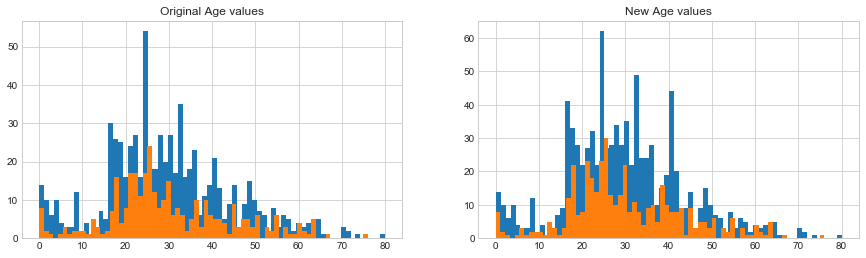

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values')
axis2.set_title('New Age values')

average_age_training   = training_data["Age"].mean()
std_age_training       = training_data["Age"].std()
count_nan_age_training = training_data["Age"].isnull().sum()

average_age_test   = test_data["Age"].mean()
std_age_test       = test_data["Age"].std()
count_nan_age_test = test_data["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_training - std_age_training,\
                           average_age_training + std_age_training,\
                           size = count_nan_age_training)
rand_2 = np.random.randint(average_age_test - std_age_test,\
                           average_age_test + std_age_test,\
                           size = count_nan_age_test)

training_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
test_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

training_data.loc[np.isnan(training_data["Age"]), "Age"] = rand_1
test_data.loc[np.isnan(test_data["Age"]), "Age"] = rand_2

training_data['Age'] = training_data['Age'].astype(int)
test_data['Age']    = test_data['Age'].astype(int)    

training_data['Age'].hist(bins=70, ax=axis2)
test_data['Age'].hist(bins=70, ax=axis2)

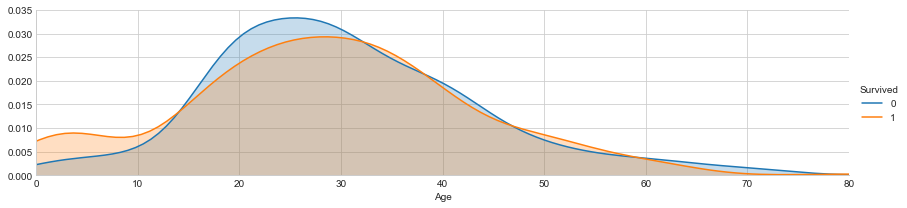

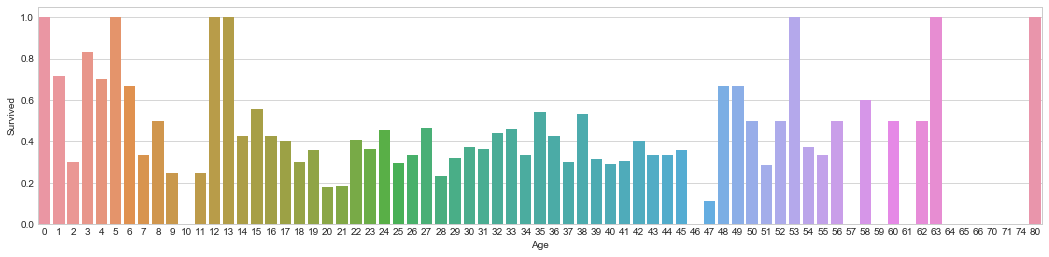

In [18]:
facet = sns.FacetGrid(training_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training_data['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))

average_age = training_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()

sns.barplot(x='Age', y='Survived', data=average_age)

In [19]:
print(training_data.info())
print("\n=====================================\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 n

The names have a prefix that, in some cases, is indicative of the social status, which may have been be an important factor in surviving the accident.
Braund, Mr. Owen Harris
Heikkinen, Miss. Laina
Oliva y Ocana, Dona. Fermina
Peter, Master. Michael J

Extracting the passenger titles and storring them in an additional column called <b>Title</b>.

In [20]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

training_data['Title'] = training_data['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])
test_data['Title'] = test_data['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Mrs


Add a field FamilySize that aggregates the information in the fields indicating the presence of a partner (Parch) or a relative (SibSp).

In [21]:
training_data['FamilySize'] = training_data['SibSp'] + training_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,0


The gender of pasanger is an important factor in surviving the accident. So is a pasenger's age.  Let us introduce a new feature to take into account the gender and age of passengers.

In [22]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
training_data['Person'] = training_data[['Age','Sex']].apply(get_person,axis=1)
test_data['Person']    = test_data[['Age','Sex']].apply(get_person,axis=1)

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,0,male


In [23]:
training_data.info()
print("\n------------------------------------\n")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
Person         891 non-null object
dtypes: float64(1), int32(1), int64(6), object(7)
memory usage: 101.0+ KB

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 n

Let us select just the features of interest. We are dropping features like Name, SibSp and Sex, whose information is either no longer needed or is accounted for in the columns that we have added.

In [24]:
training_data.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Sex'], axis=1, inplace=True)
test_data.drop(labels=['Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Sex'], axis=1, inplace=True)

In [25]:
training_data.head()

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,0,3,22,7.2500,S,Mr,1,male
1,1,1,38,71.2833,C,Mrs,1,female
2,1,3,26,7.9250,S,Miss,0,female
3,1,1,35,53.1000,S,Mrs,1,female
4,0,3,35,8.0500,S,Mr,0,male


We use the information available on passengers to build a statistical model for survivorship, which, given a "new" passenger will predict whether or not he survived. There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests.


First, let us use Pandas' get_dummies function to encode some of the features with discrete values, i.e., Person, Embarked, Title and Pclass and add those dummy variables as columns to the DataFrame object that stores the training data.

In [26]:
dummies_person_train = pd.get_dummies(training_data['Person'],prefix='Person')
dummies_embarked_train = pd.get_dummies(training_data['Embarked'], prefix= 'Embarked') 
dummies_title_train = pd.get_dummies(training_data['Title'], prefix= 'Title')
dummies_pclass_train = pd.get_dummies(training_data['Pclass'], prefix= 'Pclass')

training_data = pd.concat([training_data, dummies_person_train, dummies_embarked_train, dummies_title_train, dummies_pclass_train], axis=1)
training_data = training_data.drop(['Person','Embarked','Title', 'Pclass'], axis=1)

training_data.head()

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,0,22,7.2500,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,1,38,71.2833,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,26,7.9250,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1,35,53.1000,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,35,8.0500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [27]:
dummies_person_test   = pd.get_dummies(test_data['Person'],prefix='Person')
dummies_embarked_test = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked') 
dummies_title_test    = pd.get_dummies(test_data['Title'], prefix= 'Title')
dummies_pclass_test   = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')

test_data = pd.concat([test_data, dummies_person_test, dummies_embarked_test, dummies_title_test, dummies_pclass_test], axis=1)
test_data = test_data.drop(['Person','Embarked','Title', 'Pclass'], axis=1)

test_data.head()

,PassengerId,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,892,34,7.8292,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
1,893,47,7.0000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
2,894,62,9.6875,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3,895,27,8.6625,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,896,22,12.2875,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


Let us create a function that visualizes the accuracy of the models we are building. It plots as a continuous line the mean values of the scores of the chosen estimator for two data sets, and a coloured band around the mean line, i.e., the interval (mean - standard deviation, mean + standard deviation).

plot_learning_curve() uses in turn the function sklearn.learning_curve.learning_curve(), which determines cross-validated training and test scores for different training set sizes. An (optional) cross-validation generator splits the given dataset k times in training and test data. (The default is 3-fold cross validation.) Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The scores are averaged over all k runs for each training subset size.

In [28]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

In [29]:
# import machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve

Let us build a model for the Titanic data. First, let us split the training data set into training and validation datasets, with the validation dataset being 30% of the data.  We are using sklearn.model_selection.train_test_split() which splits arrays or matrices into random train and validation, "test", subsets.

In [ ]:
X = training_data.drop(['Survived'], axis=1)
y = training_data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

We will use GridSearchCV, which exhaustively considers all parameter combinations, to find the best model for the data. A search consists of:
- an estimator (regressor or classifier such as RandomForestClassifier(), or LogisticRegression());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; 
- a score function, such as accurracy_score()


In [ ]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# make_scorer returns a callable object that scores an estimator’s output.
#We are using accuracy_score for comparing different parameter combinations. 
acc_scorer = make_scorer(accuracy_score)

# Run the grid search for the Random Forest classifier
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set our classifier, clf, to the have the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the selected classifier to the training data
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
plot_learning_curve(clf, 'Random Forest', X, y, cv=4);

Let us turn our attention to cross-validation. We are using the sklearn.model_selection.KFold(), a K-folds cross-validator which provides training and validation/testing indices to split data into training and validation (or testing) sets. KFold() splits a dataset into k consecutive folds with each fold used once as a validation while the k - 1 remaining folds form the training set.

In [107]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    
    #run KFold with 10 folds instead of the default 3
    #on the 891 records in the training_data
    kf = KFold(891, n_folds=10)
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.822222222222
Fold 2 accuracy: 0.865168539326
Fold 3 accuracy: 0.775280898876
Fold 4 accuracy: 0.831460674157
Fold 5 accuracy: 0.820224719101
Fold 6 accuracy: 0.820224719101
Fold 7 accuracy: 0.786516853933
Fold 8 accuracy: 0.76404494382
Fold 9 accuracy: 0.887640449438
Fold 10 accuracy: 0.842696629213
Mean Accuracy: 0.821548064919


Let's repeat the above procedure for the logistic regression. Find the "best" Logistic Regression classifier: 

In [109]:
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}

# Use classification accuracy to compare parameter combinations
acc_scorer_lg = make_scorer(accuracy_score)

# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg = GridSearchCV(lg, parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

# Set our classifier, lg, to have the best combination of parameters
lg = grid_obj_lg.best_estimator_

# Fit the selected classifier to the training data. 
lg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Plot the mean accuracy, the "learning curve", of the classifier on both the training and validation datasets.

0.817164179104


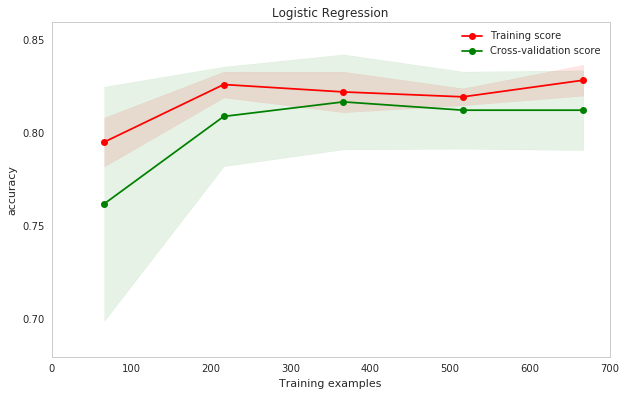

In [110]:
predictions_lg = lg.predict(X_test)
print(accuracy_score(y_test, predictions_lg))
plot_learning_curve(lg, 'Logistic Regression', X, y, cv=4);

Finally, perform predictions on the reserved test dataset using the selected Random Forest classifier and store them in a file, titanic-predictions.csv.

In [111]:
ids = test_data['PassengerId']
predictions = clf.predict(test_data.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
